# Automatic data downloading

* In this example we will show how one can download data from a jupyter notebook.
* The [PhysOcean](https://github.com/gher-ulg/PhysOcean.jl) module provides ways to automatically download data from the World Ocean Database and from CMEMS In-Situ TAC.
* This module can be installed by: 

```julia
Pkg.add("PhysOcean")
```

In [1]:
Pkg.add("PhysOcean")

INFO: Updating cache of PhysOcean...
INFO: Installing PhysOcean v0.2.0
INFO: Building Conda
INFO: Building SpecialFunctions
INFO: Building NCDatasets
INFO: Building HttpParser
INFO: Building MbedTLS
INFO: Building Gumbo
INFO: Package database updated
INFO: METADATA is out-of-date — you may not have the latest version of PhysOcean
INFO: Use `Pkg.update()` to get the latest versions of your packages


Import the necessary packages

In [2]:
using PyPlot              # Visualization package
using PhysOcean           # Download data from the World Ocean Database
using divand              # DIVAnd 

INFO: Recompiling stale cache file /home/abarth/.julia/lib/v0.6/NCDatasets.ji for module NCDatasets.
INFO: Recompiling stale cache file /home/abarth/.julia/lib/v0.6/AbstractTrees.ji for module AbstractTrees.
INFO: Recompiling stale cache file /home/abarth/.julia/lib/v0.6/Glob.ji for module Glob.


Define the time and geospatial bounding box for downloading the data

In [8]:
# resolution (the resolution is only used for DIVAnd analyses)
dx = dy = 0.25   # medium size test 

# vectors defining the longitude and latitudes grids
# Here longitude and latitude correspond to the Mediterranean Sea
lonr = -7:dx:37
latr = 30:dy:46

# time range of the in-situ data
timerange = [Date(2016,1,1),Date(2016,12,31)]

2-element Array{Date,1}:
 2016-01-01
 2016-12-31

In [9]:
?WorldOceanDatabase.download

```
dirnames,indexnames = WorldOceanDatabase.download(lonrange,latrange,timerange,
  variable,email,basedir)
```

Download data using the NODC web-service. The range parameters are vectors from with the frist element is the lower bound and the last element is the upper bound. The parameters of the functions will  be transmitted to nodc.noaa.gov (http://www.noaa.gov/privacy.html). Note that no XBT corrections are applied. The table below show the avialable variable and their units.

| Variables                          | Unit     |
|:---------------------------------- |:-------- |
| Temperature                        | °C       |
| Salinity                           | unitless |
| Oxygen                             | ml l⁻¹   |
| Phosphate                          | µM       |
| Silicate                           | µM       |
| Nitrate and Nitrate+Nitrite        | µM       |
| pH                                 | unitless |
| Chlorophyll                        | µg l⁻¹   |
| Plankton                           | multiple |
| Alkalinity                         | meq l⁻¹  |
| Partial Pressure of Carbon Dioxide | µatm     |
| Dissolved Inorganic Carbon         | mM       |
| Transmissivity                     | m⁻¹      |
| Pressure                           | dbar     |
| Air temperature                    | °C       |
| CO2 warming                        | °C       |
| CO2 atmosphere                     | ppm      |
| Air pressure                       | mbar     |
| Tritium                            | TU       |
| Helium                             | nM       |
| Delta Helium-3                     | %        |
| Delta Carbon-14                    | ᵒ/ᵒᵒ     |
| Delta Carbon-13                    | ᵒ/ᵒᵒ     |
| Argon                              | nM       |
| Neon                               | nM       |
| Chlorofluorocarbon 11 (CFC 11)     | pM       |
| Chlorofluorocarbon 12 (CFC 12)     | pM       |
| Chlorofluorocarbon 113 (CFC 113)   | pM       |
| Delta Oxygen-18                    | ᵒ/ᵒᵒ     |


In [10]:
# Name of the variable
varname = "Salinity"

"Salinity"

Please use your own email address (!) 😉     
It is only use to get notified once the dataset is ready.

In [11]:
# Email for downloading the data
email = "a.barth@ulg.ac.be"

"a.barth@ulg.ac.be"

Define the directory where the results will be saved.    
The tilde ~ will be replaced (expanded) by your home user directory.      
The command `mkpath` will create this path if necessary (including parent path).

In [12]:
basedir = expanduser("~/Downloads/WOD/Med-2016-3")
mkpath(basedir)

## Download the data

* World Ocean Database: example for bulk access data by simulating a web-user.
* Downloading can take several tens of minutes.
* SeaDataNet will provide a dedicated machine-to-machine interface during the SeaDataCloud project

In [6]:
?WorldOceanDatabase.download

```
dirnames,indexnames = WorldOceanDatabase.download(lonrange,latrange,timerange,
  variable,email,basedir)
```

Download data using the NODC web-service. The range parameters are vectors from with the frist element is the lower bound and the last element is the upper bound. The parameters of the functions will  be transmitted to nodc.noaa.gov (http://www.noaa.gov/privacy.html). Note that no XBT corrections are applied. The table below show the avialable variable and their units.

| Variables                          | Unit     |
|:---------------------------------- |:-------- |
| Temperature                        | °C       |
| Salinity                           | unitless |
| Oxygen                             | ml l⁻¹   |
| Phosphate                          | µM       |
| Silicate                           | µM       |
| Nitrate and Nitrate+Nitrite        | µM       |
| pH                                 | unitless |
| Chlorophyll                        | µg l⁻¹   |
| Plankton                           | multiple |
| Alkalinity                         | meq l⁻¹  |
| Partial Pressure of Carbon Dioxide | µatm     |
| Dissolved Inorganic Carbon         | mM       |
| Transmissivity                     | m⁻¹      |
| Pressure                           | dbar     |
| Air temperature                    | °C       |
| CO2 warming                        | °C       |
| CO2 atmosphere                     | ppm      |
| Air pressure                       | mbar     |
| Tritium                            | TU       |
| Helium                             | nM       |
| Delta Helium-3                     | %        |
| Delta Carbon-14                    | ᵒ/ᵒᵒ     |
| Delta Carbon-13                    | ᵒ/ᵒᵒ     |
| Argon                              | nM       |
| Neon                               | nM       |
| Chlorofluorocarbon 11 (CFC 11)     | pM       |
| Chlorofluorocarbon 12 (CFC 12)     | pM       |
| Chlorofluorocarbon 113 (CFC 113)   | pM       |
| Delta Oxygen-18                    | ᵒ/ᵒᵒ     |


* comment this line (or skip this cell) if the data has already been downloaded

In [5]:
?CMEMS.download

```
CMEMS.download(lonr,latr,timerange,param,username,password,basedir[; indexURLs = ...])
```

Download in situ data within the longitude range `lonr` (an array or tuple with  two elements: the minimum longitude and the maximum longitude), the latitude range `latr` (likewise), time range `timerange` (an array or tuple with two `DateTime`  structures: the starting date and the end date) from the CMEMS (Copernicus Marine environment monitoring service) in situ service [^1].   `param` is one of the parameter codes as defined in [^2] or [^3]. `username` and `password` are the credentials to access data [^1] and `basedir`  is the directory under which the data is saved. `indexURLs` is a list of the URL to the `index_history.txt` file. Per default, it includes the URLs of the Baltic, Arctic, North West Shelf, Iberian, Mediteranean and Black Sea Thematic  Assembly Center.

As these URLs might change, the latest version of the URLs to the indexes can be obtained at [^1].

# Example

```julia-repl
julia> username = "..."
julia> password = "..."
julia> lonr = [7.6, 12.2]
julia> latr = [42, 44.5]
julia> timerange = [DateTime(2016,5,1),DateTime(2016,8,1)]
julia> param = "TEMP"
julia> basedir = "/tmp"
julia> files = CMEMS.download(lonr,latr,timerange,param,username,password,basedir)
```

[^1]: http://marine.copernicus.eu/

[^2]: http://www.coriolis.eu.org/Documentation/General-Informations-on-Data/Codes-Tables

[^3]: http://doi.org/10.13155/40846


In [7]:
WorldOceanDatabase.download(lonr,latr,timerange,varname,email,basedir);

PFL is now available
CTD is now available
GLD is now available


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30.2M  100 30.2M    0     0  6853k      0  0:00:04  0:00:04 --:--:-- 6854k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  146k  100  146k    0     0   121k      0  0:00:01  0:00:01 --:--:--  121k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 32.6M  100 32.6M    0     0  5845k      0  0:00:05  0:00:05 --:--:-- 7387k


# Load data
* Load the data into memory and perform (potentially) an additional subsetting

In [13]:
# load all data under basedir as a double-precision floating point variable
val,lon,lat,depth,time,ids = WorldOceanDatabase.load(Float64,basedir,varname);

Number of data points

In [15]:
size(val)

(4440734,)

In [20]:
@show ids[1]
@show ids[2]

ids[1] = "wod_018097040O"
ids[2] = "wod_018097040O"


"wod_018097040O"

In [16]:
checkobs((lon,lat,depth,time),val,ids)

              minimum and maximum of obs. dimension 1: (-6.994999885559082, 36.989349365234375)
              minimum and maximum of obs. dimension 2: (31.152000427246094, 45.95199966430664)
              minimum and maximum of obs. dimension 3: (-0.0, 3919.363525390625)
              minimum and maximum of obs. dimension 4: (2016-01-01T00:00:00, 2016-12-31T23:54:21.959)
                          minimum and maximum of data: (10.0, 39.98847198486328)


Additional sub-setting based on time and depth for plotting

In [25]:
Dates.month.(time)

4440734-element Array{Int64,1}:
  4
  4
  4
  4
  4
  4
  4
  4
  4
  4
  4
  4
  4
  ⋮
 12
 12
 12
 12
 12
 12
 12
 12
 12
 12
 12
 12

In [21]:
# depth range levels
depthr = [0.,20.]
# month range (January to March)

timer = [1,3]
# additional sub-setting and discard bogus negative temperatures
sel = ((val .> 0 )
       .& (minimum(depthr) .<= depth .<= maximum(depthr))
       .& (minimum(timer) .<= Dates.month.(time) .<= maximum(timer)))

valsel = val[sel]
lonsel = lon[sel]
latsel = lat[sel]
depthsel = depth[sel]
timesel = time[sel]
idssel = ids[sel];

In [26]:
checkobs((lonsel,latsel,depthsel,timesel),valsel,idssel)

              minimum and maximum of obs. dimension 1: (-6.86899995803833, 36.989349365234375)
              minimum and maximum of obs. dimension 2: (31.738000869750977, 45.922000885009766)
              minimum and maximum of obs. dimension 3: (-0.0, 19.999536514282227)
              minimum and maximum of obs. dimension 4: (2016-01-01T00:00:00, 2016-03-31T23:54:21.959)
                          minimum and maximum of data: (17.80699920654297, 39.37672805786133)


Number of selected data points

In [27]:
length(valsel)

36531

Download bathymetry for plotting

In [28]:
bathname = "gebco_30sec_16.nc"

if !isfile(bathname)
    download("https://b2drop.eudat.eu/s/o0vinoQutAC7eb0/download",bathname)
else
    info("Bathymetry file already downloaded")
end

bathisglobal = true

# Extract the bathymetry for plotting
bx,by,b = divand.extract_bath(bathname,bathisglobal,lonr,latr);

INFO: Bathymetry file already downloaded


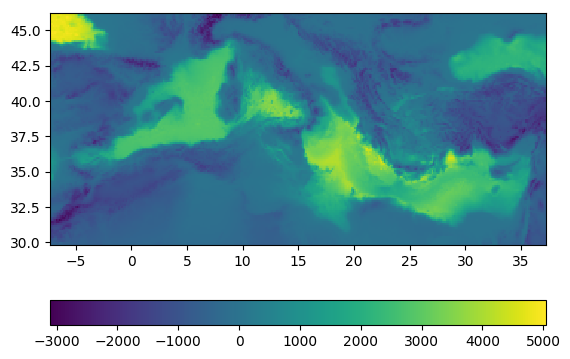

In [29]:
pcolor(bx,by,b')
#contourf(bx,by,b', levels = [-1e5,0],colors = [[.5,.5,.5]])
# compute and set the correct aspect ratio
aspect_ratio = 1/cos(mean(latr) * pi/180)
gca()[:set_aspect](aspect_ratio)
colorbar(orientation = "horizontal");

Plotting gotchas
* `colorbar()` referes to the last added item. If the last added item is the land-sea mask, the colorbar will be all gray
* maps look nicer if you set the corresponding aspect ratio based on the average latitude `mean(latr)`.

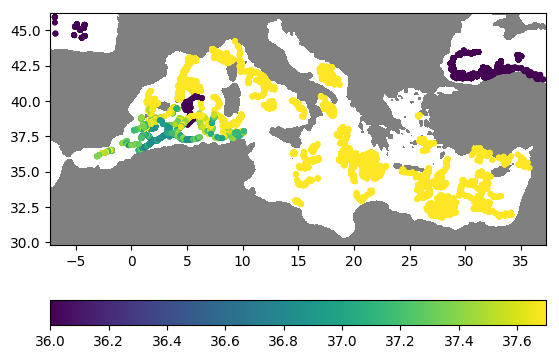

In [33]:
contourf(bx,by,b', levels = [-1e5,0],colors = [[.5,.5,.5]])
scatter(lonsel,latsel,10,valsel); 

# compute and set the correct aspect ratio
aspect_ratio = 1/cos(mean(latr) * pi/180)
gca()[:set_aspect](aspect_ratio)
colorbar(orientation = "horizontal");
clim(36,37.7)

# Check for duplicates

There are two ways to call the function `checkduplicates`:

In [16]:
?divand.Quadtrees.checkduplicates

```
dupl = checkduplicates(x,value,delta,deltavalue)
```

Based the coordinates `x` (a tuple of longitude `lons`, latitudes `lats`, depth (`zs`)  and time (`times` vector of `DateTime`)) check of points who are in the same spatio-temporal bounding  box of a length `delta`. `delta` is a vector with 4 elements corresponding to  longitude, latitude, depth and time (in days). `dupl` a vector of vectors containing indices of the duplicates.

```
dupl = checkduplicates(x1,value1,x2,v2,value2,delta,deltavalue)
```

Report duplicate of observation in data set (x2,v2) which are also in data set  (x1,v1). `x1` and `x2` is a tuple of vectors with the cooridantes and `v1` and `v2` the  corresponding values. 


In [34]:
download("https://tinyurl.com/ODV-sample","small_ODV_sample.txt")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 8163k  100 8163k    0     0  2110k      0  0:00:03  0:00:03 --:--:-- 2660k


"small_ODV_sample.txt"

In [36]:
?ODVspreadsheet.load

```
 profiles,lons,lats,depths,times,ids = load(T,fnames,datanames;
    qv_flags = [divand.ODVspreadsheet.GOOD_VALUE,
                divand.ODVspreadsheet.PROBABLY_GOOD_VALUE],
    nametype = :P01)
```

Load all profiles in all file from the array `fnames` corresponding to one of the parameter names `datanames`. If `nametype` is `:P01` (default), the datanames are P01 vocabulary names with the SDN prefix. If nametype is `:localname`, then they are the ODV column header without units. For example if the column header is `Water body salinity [per mille]`, then `datenames` should be `["Water body salinity"]`. The resulting vectors have the data type `T` (expect `times` and `ids` which are vectors of `DateTime` and `String` respectively). Only values matching the quality flag `qv_flags` are retained. `qv_flags` is a vector of Strings (based on http://vocab.nerc.ac.uk/collection/L20/current/, e.g. "1" means "good value"). One can also use the constants these constants (prefixed with `divand.ODVspreadsheet.`):

|                   constant | value |
| --------------------------:| -----:|
|         NO_QUALITY_CONTROL |   "0" |
|                 GOOD_VALUE |   "1" |
|        PROBABLY_GOOD_VALUE |   "2" |
|         PROBABLY_BAD_VALUE |   "3" |
|                  BAD_VALUE |   "4" |
|              CHANGED_VALUE |   "5" |
|      VALUE_BELOW_DETECTION |   "6" |
|            VALUE_IN_EXCESS |   "7" |
|         INTERPOLATED_VALUE |   "8" |
|              MISSING_VALUE |   "9" |
| VALUE_PHENOMENON_UNCERTAIN |   "A" |

If the ODV does not contain a semantic header (e.g. for the aggregated ODV files), then local names must be used.

```julia-repl
julia> data,lon,lat,depth,time,ids = divand.ODVspreadsheet.load(Float64,["data_from_med_profiles_non-restricted_v2.txt"],
      ["Water body salinity"]; nametype = :localname );
```

No checks are done if the units are consistent.

```
 profiles,lons,lats,depths,times,ids = load(T,dir,P01names)
```

Load all ODV files under the directory `dir` corresponding the one of the parameter names `P01names`. The resulting vectors have the data type `T` (expect `times` and `ids` which are vectors of `DateTime` and `String` respectively).

No checks are done if the units are consistent.


In [35]:
val_ODV,lon_ODV,lat_ODV,depth_ODV,time_ODV,ids_ODV = ODVspreadsheet.load(Float64,["small_ODV_sample.txt"],
                           ["Water body salinity"]; nametype = :localname );

INFO: No. of profiles in the file: 71


Look for duplicates
* within 0.01 degree (about 1km)
* within 0.01 m depth
* within 1 minute
Difference in value is 0.01 psu

In [37]:
dupl = divand.Quadtrees.checkduplicates((lon_ODV,lat_ODV,depth_ODV,time_ODV),val_ODV,(lon,lat,depth,time),val,(0.01,0.01,0.01,1/(24*60)),0.01);

In [63]:
size(val)

(4440734,)

In [64]:
size(dupl)

(4440734,)

* `dupl` is an array of the same length as `val`
* If i-th element of `dupl`, is an empty list, then the i-th element in `val` is probably not a duplicate
* Otherwise, then the i-th element in `val` is probably a duplicate of the element `val_ODV` with the indices `dupl[i]`.

In [38]:
dupl[1]

0-element Array{Int64,1}

In [44]:
index = find(.!isempty.(dupl))

4191-element Array{Int64,1}:
 3158229
 3158230
 3158231
 3158232
 3158233
 3158234
 3158235
 3158236
 3158237
 3158238
 3158239
 3158240
 3158241
       ⋮
 4204640
 4204641
 4204642
 4204643
 4204644
 4204645
 4204646
 4204647
 4204648
 4204649
 4204650
 4204651

Number of duplicate candidates

In [40]:
length(index)

4191

Check the first reported duplicate

In [41]:
index_WOD = index[1]

3158229

Its coordinate and values from the ODV file

In [42]:
lon[index_WOD],lat[index_WOD],depth[index_WOD],time[index_WOD],val[index_WOD]

(17.885482788085938, 35.23445129394531, 2.4818837642669678, 2016-06-14T10:38:27.239, 38.85300064086914)

They are quite close to the data point with the index:

In [43]:
dupl[index_WOD]

1-element Array{Int64,1}:
 20508

In [45]:
index_ODV = dupl[index_WOD][1]

20508

In [47]:
lon_ODV[index_ODV],lat_ODV[index_ODV],depth_ODV[index_ODV],time_ODV[index_ODV],val_ODV[index_ODV]

(17.88548, 35.23445, 2.48189, 2016-06-14T10:39:00, 38.853)

Indeed, it is quite likely that they are duplicates


Combine the dataset and retain only new points from WOD

In [53]:
#find(isempty.(dupl))

In [48]:
newpoints = find(isempty.(dupl));
@show length(newpoints)
lon_combined   = [lon_ODV;   lon[newpoints]];
lat_combined   = [lat_ODV;   lat[newpoints]];
depth_combined = [depth_ODV; depth[newpoints]];
time_combined  = [time_ODV;  time[newpoints]];
val_combined   = [val_ODV;   val[newpoints]];
ids_combined   = [ids_ODV;   ids[newpoints]];


length(newpoints) = 4436543
